This is used to specify the mean velocity profile. This profile is written to a file, which can then be put in the yaml file.

Another approach is to create a bunch of restart files with various turbulent initial conditions. That is in a different file.

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [12]:
djet = 0.526E-2         # m
uavg = 53.0            # m/s
npts = 100             # points over the jet diameter
umua = 69.876/53.0 #1.23            # umax/uavg 1.28

In [48]:
umax = umua*uavg       # m/s
rjet = djet * 0.5      # m

aa = 2.0*(1.0-umua)
bb = 3.0
cc = 1.0
npow = (-bb-np.sqrt(bb**2.0 - 4.0*aa*cc))/2.0/aa

rj = np.linspace(0,rjet,npts)
uj = umax * (1.0-abs(rj)/rjet)**(1.0/npow)

utau = 3.738
rj2 = np.linspace(0,rjet*0.9999,npts)
uj2 = umax + 1.0/0.41*utau*(np.sqrt(rj2/rjet) + np.log(1.0-np.sqrt(rj2/rjet)))
print(umax, npow)

69.876 5.0234230469


In [49]:
rcf = np.array([1, 1.1, 1.2, 1.4, 1.7, 1.8, 2.5, 3.2, 3.8,4]) * djet    # DOL added last point to get flat interpolation
ucf = np.array([0,4.5,7.9,8.25,8.6,8.7,9,9.15,9.25,9.25])

In [50]:
r = np.hstack((rj,rcf))
r = np.hstack((-np.flipud(r), r))
u = np.hstack((uj,ucf))
u = np.hstack((np.flipud(u),u))
u[np.where(u<0.001)] = 0.5

u2 = np.hstack((uj2,ucf))
u2 = np.hstack((np.flipud(u2),u2))
u2[np.where(u2<0.001)] = 0.5

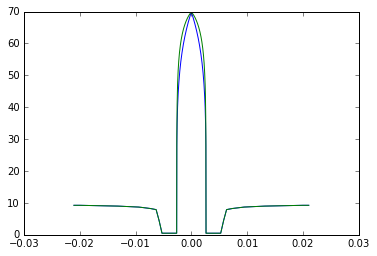

In [51]:
plt.plot(r,u)
plt.plot(r,u2)

In [25]:
d = np.vstack((r,u)).T
np.savetxt("v0.dat", d, header="r (m), u (m/s)")